In [55]:
import os
from matplotlib.pyplot import imread, imshow
import numpy as np

image = imread(os.path.join('..', 'DATA', 'dog.jpg'))
image = np.mean(image, -1)
n, m = image.shape
U, S, VT = np.linalg.svd(image)

In [56]:
print(U.shape, S.shape, VT.shape)

(2000, 2000) (1500,) (1500, 1500)


In [57]:
image_reconstructed = U @ np.pad(np.diag(S), [(0, n - m), (0, 0)]) @ VT

r = 1000
identity_matrix = np.eye(r)
U_truncated = U[:, :r]
is_identity = np.allclose(U_truncated.T @ U_truncated, identity_matrix)
print(is_identity)

identity_matrix = np.eye(n)
is_identity = np.allclose(U_truncated @ U_truncated.T, identity_matrix)
print(is_identity)

True
False


In [60]:
errors = []
range = np.arange(1, n)
for r in range:
    U_truncated = U[:, :r]
    errors.append(np.linalg.norm(U_truncated.T @ U_truncated - np.eye(r)))

Text(0, 0.5, 'Error')

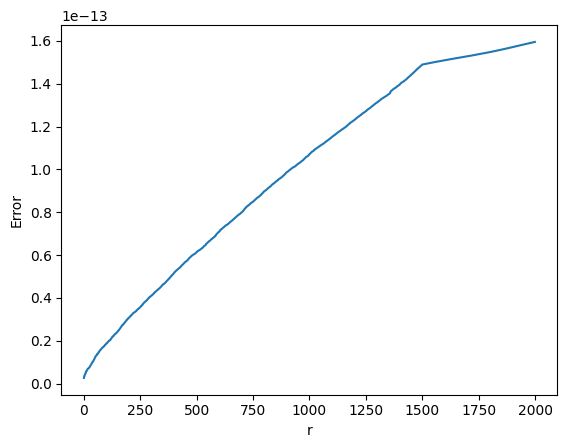

In [61]:
import matplotlib.pyplot as plt

plt.plot(range, errors)
plt.xlabel('r')
plt.ylabel('Error')